In [62]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [63]:
!pip install numpy pandas pickle seaborn music21 iteration_utilities
!pip install git+https://github.com/quadrismegistus/prosodic.git
!apt install musescore3

ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle
  Cloning https://github.com/quadrismegistus/prosodic.git to /tmp/pip-req-build-_5y57bi8
  Running command git clone --filter=blob:none --quiet https://github.com/quadrismegistus/prosodic.git /tmp/pip-req-build-_5y57bi8
  Resolved https://github.com/quadrismegistus/prosodic.git to commit d8944c49428bb884227847e3f159cdbaed7f35eb
  Running command git submodule update --init --recursive -q
  Preparing metadata (setup.py) ... done
  Cloning https://github.com/dmort27/syllabiphon to /tmp/pip-install-28jk9dzu/syllabiphon_714f56be518e48d88a97a4462924f4b4
  Running command git clone --filter=blob:none --quiet https://github.com/dmort27/syllabiphon /tmp/pip-install-28jk9dzu/syllabiphon_714f56be518e48d88a97a4462924f4b4
  Resolved https://github.com/dmort27/syllabiphon to commit 7cb3452d77e357bb8dcdf7a7e7d8a37babe235b6
  Preparing metadata (setup.py) ... do

In [64]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import os
import seaborn as sns
import pickle
import music21

from fractions import Fraction
from collections import defaultdict, Counter
# from iteration_utilities import deepflatten #flatten nested lists

from music21 import midi, note, stream, instrument, meter, key
import itertools
import random

import string
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [65]:
import music21
import os
import pandas as pd

# # Pull in the score and listen to it a bit
# sample_score_tmp = music21.converter.parse(f'{dependencies}blue_bossa.mxl')
# sample_score_tmp.show()

# Task C

In [66]:
file_path = '/content/drive/MyDrive/MunA10M.mid'

In [67]:
midi_file = music21.midi.MidiFile()
midi_file.open(file_path)
midi_file.read()
midi_file.close()
stream = music21.midi.translate.midiFileToStream(midi_file)

notes = []
dynamics = []
articulations = []
rests = []
ornaments = []

for part in stream.parts:
    for element in part.flat:
        if isinstance(element, music21.note.Note):
            # Extracting note and force information
            notes.append((element.pitch, element.duration.quarterLength, element.volume.velocity))
            # Checking the Decorative Tone
            for ornament in element.expressions:
                if isinstance(ornament, music21.expressions.Ornament):
                    ornaments.append((element.pitch, ornament))
        elif isinstance(element, music21.note.Rest):
            # Extract rest information
            rests.append(element.duration.quarterLength)
        elif isinstance(element, music21.dynamics.Dynamic):
            # Extracting dynamic markers
            dynamics.append(str(element))
        elif isinstance(element, music21.articulations.Articulation):
            # Extracting the ornamentation (Articulation)）
            articulations.append(str(element))

print("Notes:", notes)
print("Dynamics:", dynamics)
print("Articulations:", articulations)
print("Rests:", rests)
print("Ornaments:", ornaments)


Notes: [(<music21.pitch.Pitch G4>, 1.5, 51), (<music21.pitch.Pitch G3>, Fraction(2, 3), 27), (<music21.pitch.Pitch G4>, 1.0, 66), (<music21.pitch.Pitch G3>, 0.25, 47), (<music21.pitch.Pitch E5>, 1.75, 65), (<music21.pitch.Pitch E4>, 1.75, 44), (<music21.pitch.Pitch E5>, 1.25, 65), (<music21.pitch.Pitch E4>, Fraction(19, 12), 44), (<music21.pitch.Pitch C5>, 0.75, 42), (<music21.pitch.Pitch C4>, 1.0, 25), (<music21.pitch.Pitch G4>, Fraction(2, 3), 50), (<music21.pitch.Pitch G4>, Fraction(1, 3), 50), (<music21.pitch.Pitch F4>, 0.25, 52), (<music21.pitch.Pitch E4>, Fraction(1, 3), 59), (<music21.pitch.Pitch C4>, Fraction(1, 3), 61), (<music21.pitch.Pitch G3>, Fraction(1, 3), 58), (<music21.pitch.Pitch C4>, Fraction(1, 3), 69), (<music21.pitch.Pitch E4>, Fraction(1, 3), 72), (<music21.pitch.Pitch G4>, Fraction(1, 3), 69), (<music21.pitch.Pitch G2>, Fraction(2, 3), 65), (<music21.pitch.Pitch G2>, Fraction(2, 3), 43), (<music21.pitch.Pitch G4>, 0.5, 52), (<music21.pitch.Pitch G3>, 0.5, 31), (

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: Music21DeprecationWarning: .flat is deprecated.  Call .flatten() instead
  exec(code_obj, self.user_global_ns, self.user_ns)


In [68]:
def extract_musicxml_info(xml_file_path):
    score = music21.converter.parse(xml_file_path)

    notes_list = []
    velocities_list = []
    ornaments_list = []
    rests_list = []
    dynamics_list = []

    for part in score.parts:
        for measure in part.getElementsByClass(music21.stream.Measure):
            for element in measure.elements:
                if isinstance(element, music21.note.Note):
                    # Extracting note information
                    notes_list.append((str(element.pitch), element.duration.quarterLength))
                    if element.volume.velocity is not None:
                        velocities_list.append(element.volume.velocity)
                elif isinstance(element, music21.note.Rest):
                    # Extract rest information
                    rests_list.append(element.duration.quarterLength)
                elif isinstance(element, music21.dynamics.Dynamic):
                    # Extracting dynamic markers
                    dynamics_list.append(str(element))
                # if element.articulations:
                #     articulations = [str(art) for art in element.articulations]
                #     ornaments_list.append((str(element.pitch), articulations))

    return notes_list, velocities_list, ornaments_list, rests_list, dynamics_list

xml_file_path = '/content/drive/MyDrive/xml_score.musicxml'

notes, velocities, ornaments, rests, dynamics = extract_musicxml_info(xml_file_path)
print("Notes (Pitch, Duration):", notes)
print("Velocities:", velocities)
print("Ornaments:", ornaments)
print("Rests (Duration):", rests)
print("Dynamics:", dynamics)


Notes (Pitch, Duration): [('E5', 2.0), ('C5', 0.5), ('E5', 2.0), ('C5', 0.5), ('B4', 0.25), ('A5', 0.125), ('G5', Fraction(1, 3)), ('F#5', Fraction(1, 3)), ('E5', Fraction(1, 3)), ('B4', 0.25), ('A5', 0.125), ('G5', Fraction(1, 3)), ('F#5', Fraction(1, 3)), ('E5', Fraction(1, 3)), ('B4', 0.25), ('B6', 0.5), ('B5', 0.25), ('G5', 0.5), ('E5', 0.25), ('G5', 0.5), ('E5', 0.25), ('G5', 0.5), ('E5', 0.25), ('G5', 0.5), ('E5', 0.25), ('G5', 0.5), ('E5', 0.25), ('G5', 0.5), ('E5', 0.25), ('G4', 0.25), ('G4', 0.25), ('G4', 0.25), ('G4', 0.5), ('A4', 0.25), ('B4', 0.25), ('C5', 0.5), ('G4', 0.5), ('C5', 0.5), ('B4', 0.25), ('A5', 0.125), ('G5', Fraction(1, 3)), ('F#5', Fraction(1, 3)), ('E5', Fraction(1, 3)), ('B4', 0.25), ('A5', 0.125), ('G5', Fraction(1, 3)), ('F#5', Fraction(1, 3)), ('E5', Fraction(1, 3)), ('B4', 0.25), ('B6', 0.5), ('B5', 0.25), ('G5', 0.5), ('E5', 0.25), ('G5', 0.5), ('E5', 0.25), ('G5', 0.5), ('E5', 0.25), ('G5', 0.5), ('E5', 0.25), ('G5', 0.5), ('E5', 0.25), ('G5', 0.5), 

In [69]:
def analyze_pitch_and_rhythm(xml_file_path):
    score = music21.converter.parse(xml_file_path)
    pitch_occurrences = {}
    rhythm_occurrences = {}

    # Handling pitch and rhythmic repetition
    for element in score.recurse():
        if isinstance(element, music21.note.Note):
            # process a single tone (e.g. in phonetics)
            pitch = element.pitch.midi
            duration = element.duration.quarterLength
            pitch_occurrences[pitch] = pitch_occurrences.get(pitch, 0) + 1
            rhythm_occurrences[duration] = rhythm_occurrences.get(duration, 0) + 1
        elif isinstance(element, music21.chord.Chord):
            # process chords
            for pitch in element.pitches:
                midi_pitch = pitch.midi
                duration = element.duration.quarterLength
                pitch_occurrences[midi_pitch] = pitch_occurrences.get(midi_pitch, 0) + 1
                rhythm_occurrences[duration] = rhythm_occurrences.get(duration, 0) + 1

    return pitch_occurrences, rhythm_occurrences

pitch_occurrences, rhythm_occurrences = analyze_pitch_and_rhythm(xml_file_path)
print("Pitch Occurrences:", pitch_occurrences)
print("Rhythm Occurrences:", rhythm_occurrences)


Pitch Occurrences: {67: 240, 64: 135, 60: 78, 76: 101, 69: 110, 72: 81, 55: 194, 65: 30, 62: 231, 59: 79, 63: 21, 58: 44, 66: 91, 70: 18, 71: 111, 77: 21, 74: 46, 68: 10, 79: 67, 75: 15, 78: 23, 83: 15, 81: 6, 95: 3, 82: 6, 87: 6, 86: 6, 91: 6, 89: 6, 84: 3, 57: 106, 73: 2, 54: 29, 52: 38, 48: 56, 43: 91, 45: 43, 47: 55, 46: 14, 51: 21, 50: 149, 53: 21, 40: 5, 35: 9, 56: 3, 38: 62, 33: 52, 37: 24, 36: 18, 42: 24, 31: 30}
Rhythm Occurrences: {1.0: 339, Fraction(1, 3): 807, 0.75: 150, 0.25: 264, 0.125: 60, 2.0: 20, 0.5: 915, 1.5: 34, 3.0: 66}


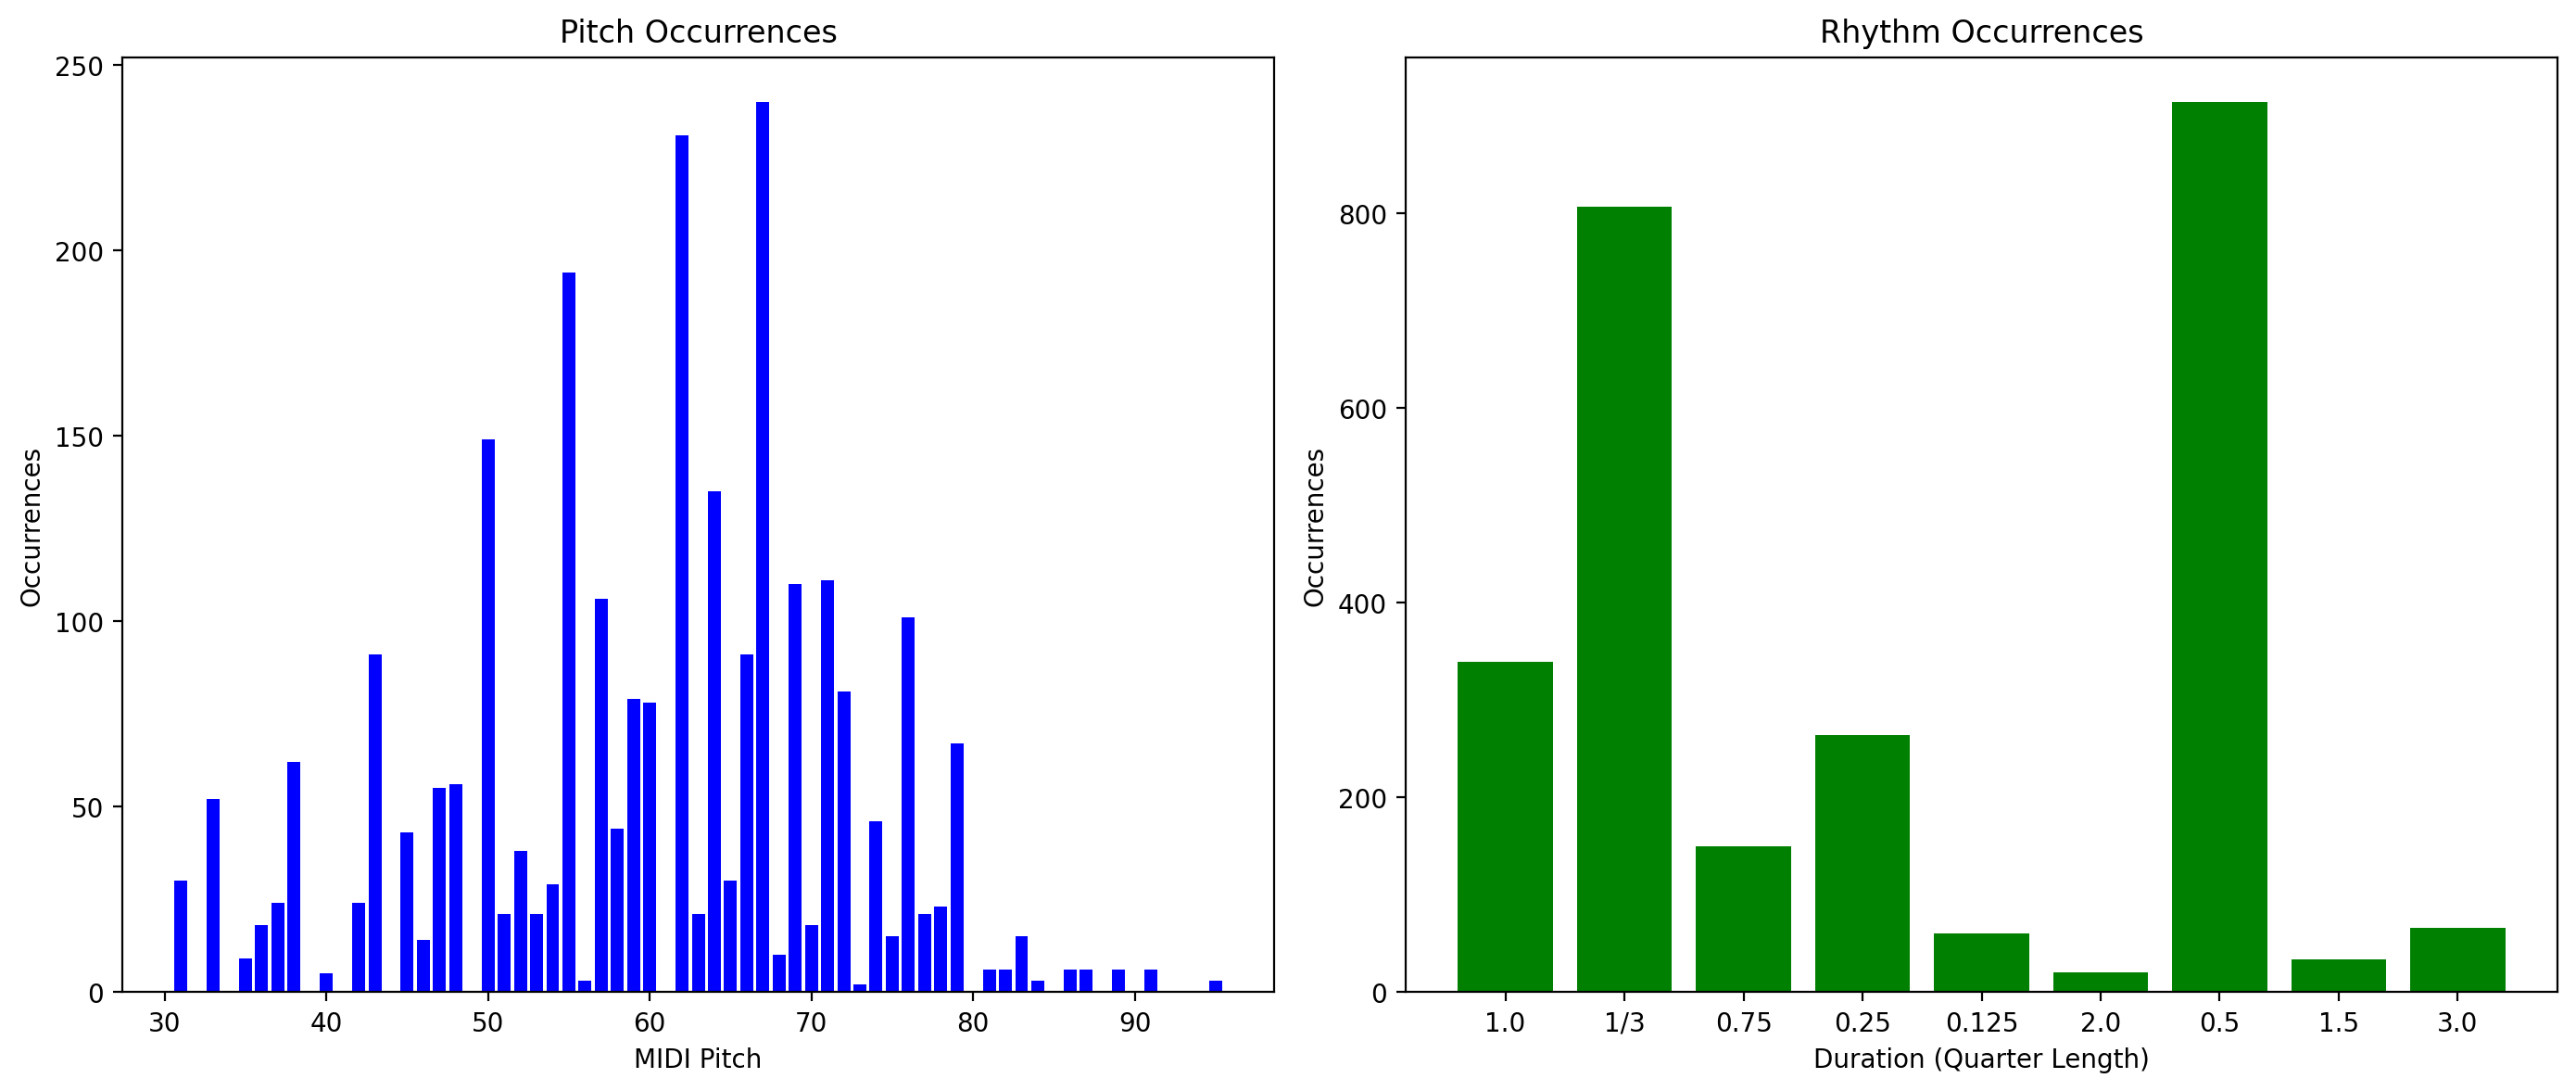

In [70]:
def plot_pitch_and_rhythm_occurrences(pitch_occurrences, rhythm_occurrences):
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    pitches = list(pitch_occurrences.keys())
    occurrences = list(pitch_occurrences.values())
    plt.bar(pitches, occurrences, color='blue')
    plt.title('Pitch Occurrences')
    plt.xlabel('MIDI Pitch')
    plt.ylabel('Occurrences')

    plt.subplot(1, 2, 2)
    durations = list(rhythm_occurrences.keys())
    occurrences = list(rhythm_occurrences.values())
    plt.bar([str(d) for d in durations], occurrences, color='green')
    plt.title('Rhythm Occurrences')
    plt.xlabel('Duration (Quarter Length)')
    plt.ylabel('Occurrences')

    plt.tight_layout()
    plt.show()

plot_pitch_and_rhythm_occurrences(pitch_occurrences, rhythm_occurrences)

# n-pitches detect

In [71]:
from music21 import converter, note, chord

def extract_pitches_from_midi(file_path):
    # 加载 MIDI 文件
    score = converter.parse(file_path)

    # 创建一个列表存储音高
    pitches = []

    # 遍历乐谱中的所有元素
    for element in score.recurse():
        if isinstance(element, note.Note):
            # 如果是单个音符，获取其 MIDI 音高
            pitches.append(element.pitch.midi)
        elif isinstance(element, chord.Chord):
            # 如果是和弦，获取和弦中每个音符的 MIDI 音高
            pitches.extend([p.midi for p in element.pitches])

    return pitches

file_path = '/content/drive/MyDrive/MunA10M.mid' # MIDI 文件的路径
pitch_list = extract_pitches_from_midi(file_path)
print(pitch_list)

[67, 57, 69, 55, 67, 55, 64, 52, 60, 48, 76, 64, 76, 67, 64, 55, 72, 67, 60, 76, 64, 65, 60, 55, 60, 64, 67, 43, 64, 67, 64, 55, 45, 65, 62, 55, 47, 67, 55, 64, 48, 60, 43, 59, 62, 55, 48, 64, 60, 55, 67, 63, 55, 45, 65, 62, 55, 47, 48, 60, 55, 63, 43, 43, 55, 59, 62, 63, 48, 55, 60, 65, 62, 46, 58, 65, 46, 58, 62, 67, 51, 58, 63, 67, 51, 58, 63, 69, 50, 62, 66, 69, 50, 66, 62, 70, 67, 62, 55, 70, 62, 55, 67, 71, 53, 62, 67, 55, 43, 71, 67, 62, 43, 53, 55, 71, 67, 62, 43, 53, 55, 77, 43, 71, 65, 55, 50, 65, 55, 55, 48, 64, 72, 76, 48, 64, 72, 77, 43, 67, 55, 55, 48, 64, 72, 76, 48, 64, 72, 69, 57, 67, 55, 64, 52, 60, 48, 55, 64, 76, 76, 67, 64, 67, 55, 60, 67, 72, 76, 64, 65, 60, 60, 64, 43, 47, 48, 64, 55, 67, 67, 64, 55, 45, 65, 62, 55, 67, 64, 60, 55, 43, 62, 59, 55, 64, 48, 60, 55, 67, 55, 63, 45, 65, 55, 62, 47, 43, 63, 48, 55, 60, 43, 59, 62, 55, 63, 48, 60, 55, 65, 46, 62, 58, 46, 58, 65, 62, 67, 63, 51, 58, 67, 63, 58, 51, 69, 66, 50, 62, 69, 66, 50, 62, 69, 66, 50, 62, 70, 67,

In [72]:
def find_repeated_patterns(pitch_list, pattern_length):
    pattern_dict = defaultdict(int)
    for i in range(len(pitch_list) - pattern_length + 1):
        pattern = tuple(pitch_list[i:i + pattern_length])
        pattern_dict[pattern] += 1
    return pattern_dict

def filter_subpatterns(repeated_patterns):
    patterns = list(repeated_patterns.keys())
    filtered_patterns = set(patterns)

    for i, pattern1 in enumerate(patterns):
        for pattern2 in patterns[i+1:]:
            if len(pattern1) < len(pattern2):
                if any(pattern1 == pattern2[j:j+len(pattern1)] for j in range(len(pattern2) - len(pattern1) + 1)):
                    filtered_patterns.discard(pattern1)
                    break

    return {pattern: repeated_patterns[pattern] for pattern in filtered_patterns}

In [73]:
def get_filtered_patterns(pitch_list, direction='forward'):
    all_repeated_patterns = defaultdict(int)

    if direction == 'forward':
        for pattern_length in range(9, 20):
            # print(f"Checking forward patterns of length {pattern_length}:")
            repeated_patterns = find_repeated_patterns(pitch_list, pattern_length)
            for pattern, count in repeated_patterns.items():
                if count > 1:
                    all_repeated_patterns[pattern] = count
                    print(f'Pattern {pattern} occurs {count} times.')
    elif direction == 'backward':
        for pattern_length in range(8, 19):
            # print(f"Checking backward patterns of length {pattern_length}:")
            repeated_patterns = find_repeated_patterns(pitch_list, pattern_length)
            for pattern, count in repeated_patterns.items():
                if count > 1:
                    all_repeated_patterns[pattern] = count
                    print(f'Pattern {pattern} occurs {count} times.')

    # 过滤子模式
    filtered_patterns = filter_subpatterns(all_repeated_patterns)

    return filtered_patterns

In [74]:
# 获取并过滤向前扩展的模式
filtered_patterns_forward = get_filtered_patterns(pitch_list, direction='forward')
# 获取并过滤向后扩展的模式
filtered_patterns_backward = get_filtered_patterns(pitch_list, direction='backward')

# 将结果保存到文件
def save_patterns_to_file(filtered_patterns, filename):
    with open(filename, 'w') as f:
        json.dump({str(k): v for k, v in filtered_patterns.items()}, f)

save_patterns_to_file(filtered_patterns_forward, 'filtered_patterns_forward.json')
save_patterns_to_file(filtered_patterns_backward, 'filtered_patterns_backward.json')

# 打印过滤后的模式
print("Filtered forward expansion patterns:")
for pattern, count in filtered_patterns_forward.items():
    print(f'Pattern {pattern} occurs {count} times.')

print("Filtered backward expansion patterns:")
for pattern, count in filtered_patterns_backward.items():
    print(f'Pattern {pattern} occurs {count} times.')

Pattern (71, 67, 62, 43, 53, 55, 71, 67, 62) occurs 2 times.
Pattern (67, 62, 43, 53, 55, 71, 67, 62, 43) occurs 2 times.
Pattern (43, 53, 55, 77, 43, 71, 65, 55, 50) occurs 2 times.
Pattern (55, 55, 48, 64, 72, 76, 48, 64, 72) occurs 2 times.
Pattern (59, 55, 64, 48, 60, 55, 67, 55, 63) occurs 2 times.
Pattern (77, 43, 76, 72, 48, 55, 64, 76, 77) occurs 2 times.
Pattern (43, 76, 72, 48, 55, 64, 76, 77, 76) occurs 2 times.
Pattern (71, 59, 72, 60, 67, 55, 64, 52, 79) occurs 3 times.
Pattern (59, 72, 60, 67, 55, 64, 52, 79, 67) occurs 3 times.
Pattern (72, 60, 67, 55, 64, 52, 79, 67, 76) occurs 2 times.
Pattern (60, 67, 55, 64, 52, 79, 67, 76, 64) occurs 2 times.
Pattern (67, 55, 64, 52, 79, 67, 76, 64, 71) occurs 2 times.
Pattern (55, 64, 52, 79, 67, 76, 64, 71, 59) occurs 2 times.
Pattern (71, 59, 81, 63, 79, 64, 78, 66, 76) occurs 4 times.
Pattern (59, 81, 63, 79, 64, 78, 66, 76, 67) occurs 4 times.
Pattern (76, 67, 83, 47, 75, 78, 71, 59, 81) occurs 2 times.
Pattern (67, 83, 47, 75,

In [75]:
def merge_and_filter_patterns(patterns1, patterns2):
    merged_patterns = patterns1.copy()
    for pattern, count in patterns2.items():
        if pattern in merged_patterns:
            merged_patterns[pattern] += count
        else:
            merged_patterns[pattern] = count
    return merged_patterns

final_patterns = merge_and_filter_patterns(filtered_patterns_forward, filtered_patterns_backward)

# 将最终结果保存到文件中
def save_patterns_to_file(filtered_patterns, filename):
    with open(filename, 'w') as f:
        json.dump({str(k): v for k, v in filtered_patterns.items()}, f)

save_patterns_to_file(final_patterns, 'final_filtered_patterns.json')

# 打印最终过滤后的模式
print("Final filtered patterns:")
for pattern, count in final_patterns.items():
    print(f'Pattern {pattern} occurs {count} times.')

Final filtered patterns:
Pattern (59, 55, 64, 48, 60, 55, 67, 55, 63) occurs 4 times.
Pattern (55, 55, 48, 64, 72, 76, 48, 64, 72) occurs 4 times.
Pattern (43, 53, 55, 77, 43, 71, 65, 55, 50) occurs 4 times.
Pattern (71, 59, 72, 60, 67, 55, 64, 52, 79, 67, 76, 64) occurs 4 times.
Pattern (76, 67, 83, 47, 75, 78, 71, 59, 81, 63, 79, 64, 78, 66, 76, 67, 47, 83) occurs 4 times.
Pattern (71, 67, 62, 43, 53, 55, 71, 67, 62, 43) occurs 4 times.
Pattern (84, 72, 67, 60, 64, 84, 72, 67, 60, 64) occurs 4 times.
Pattern (67, 55, 64, 52, 79, 67, 76, 64, 71, 59) occurs 4 times.
Pattern (77, 43, 76, 72, 48, 55, 64, 76, 77, 76) occurs 4 times.
Pattern (64, 52, 60, 48, 76, 64, 76, 67) occurs 2 times.
Pattern (64, 67, 64, 55, 45, 65, 62, 55) occurs 2 times.
Pattern (78, 75, 71, 59, 81, 63, 79, 64) occurs 2 times.
Pattern (78, 66, 43, 79, 67, 43, 55, 47) occurs 2 times.
Pattern (79, 67, 83, 47, 78, 75, 71, 59) occurs 2 times.
Pattern (69, 66, 50, 62, 69, 66, 50, 62) occurs 2 times.
Pattern (72, 67, 60,

# Melody contour

In [76]:
def extract_melodic_contour(midi_file_path):
    midi_data = music21.converter.parse(midi_file_path)

    # Get the pitch values of all notes
    pitches = []
    for note in midi_data.recurse().notes:
        if note.isNote:
            pitches.append(note.pitch.midi)

    # 计算旋律线条
    contours = []
    for i in range(1, len(pitches)):
        if pitches[i] > pitches[i-1]:
            contours.append('up')  # pitch rise
        elif pitches[i] < pitches[i-1]:
            contours.append('down')  # pitch down
        else:
            contours.append('same')

    return contours

contours = extract_melodic_contour(file_path)
print("Melodic Contour:", contours)

Melodic Contour: ['down', 'up', 'down', 'down', 'down', 'up', 'down', 'down', 'up', 'down', 'up', 'down', 'down', 'up', 'up', 'up', 'down', 'up', 'up', 'down', 'up', 'down', 'same', 'up', 'down', 'down', 'up', 'down', 'up', 'up', 'up', 'up', 'down', 'up', 'down', 'same', 'up', 'down', 'up', 'down', 'up', 'same', 'down', 'up', 'down', 'up', 'down', 'up', 'up', 'down', 'down', 'same', 'down', 'down', 'up', 'down', 'up', 'up', 'down', 'down', 'down', 'up', 'down', 'up', 'down', 'up', 'down', 'up', 'up', 'down', 'down', 'up', 'down', 'up', 'down', 'down', 'up', 'down', 'up', 'down', 'down', 'up', 'up', 'same', 'same', 'up', 'down', 'down', 'down', 'up', 'down', 'up', 'up', 'same', 'down', 'up', 'down', 'down', 'up', 'up', 'up', 'down', 'down', 'down', 'up', 'down', 'up', 'up', 'down', 'up', 'up', 'up', 'up', 'down', 'down', 'down', 'up', 'down', 'down', 'down', 'up', 'down', 'same', 'up', 'down', 'up', 'up', 'down', 'up', 'down', 'up', 'down', 'down', 'down', 'up', 'down', 'down', 'up', 'd

In [ ]:
def extract_pitches_and_intervals(midi_file_path):
    midi_data = music21.converter.parse(midi_file_path)

    pitches = []
    for note in midi_data.recurse().notes:
        if note.isNote:
            pitches.append(note.pitch.midi)

    # Calculate the interval (difference) between pitches
    intervals = []
    for i in range(1, len(pitches)):
        interval = pitches[i] - pitches[i-1]
        intervals.append(interval)

    return pitches, intervals

pitches, intervals = extract_pitches_and_intervals(file_path)
print("Pitches:", pitches)
print("Intervals:", intervals)

Pitches: [67, 55, 76, 67, 64, 55, 72, 67, 60, 76, 64, 65, 60, 55, 60, 64, 67, 43, 64, 67, 43, 67, 55, 55, 76, 67, 64, 67, 55, 60, 67, 72, 76, 64, 65, 60, 60, 64, 43, 64, 55, 67, 67, 43, 77, 43, 77, 43, 76, 77, 76, 72, 72, 64, 40, 69, 60, 62, 77, 76, 72, 69, 71, 62, 71, 47, 83, 67, 76, 79, 76, 64, 67, 57, 67, 64, 48, 67, 64, 79, 67, 55, 64, 67, 67, 67, 69, 67, 64, 60, 64, 60, 67, 76, 76, 55, 57, 52, 48, 55, 64, 79, 77, 72, 67, 76, 64, 76, 79, 43, 47, 67, 76, 77, 76, 72, 69, 72, 69, 52, 40, 74, 64, 64, 76, 53, 60, 71, 52, 71, 40, 76, 72, 69, 62, 77, 71, 59, 67, 47, 83, 67, 76, 76, 79, 67, 64, 55, 57, 48, 67, 67, 67, 67, 64, 60, 67, 69, 64, 60, 67, 67, 67, 60, 76, 76, 64, 79, 55, 57, 55, 48, 64, 52, 77, 72, 67, 76, 76, 79, 43, 79, 64, 47, 71, 67, 72, 43, 50, 62, 57, 62, 54, 62, 43, 50, 50, 43, 62, 50, 43, 71, 69, 67, 62, 69, 62, 66, 74, 55, 50, 43, 71, 45, 57, 72, 74, 43, 78, 50, 74, 50, 60, 57, 62, 43, 62, 50, 62, 50, 43, 62, 43, 50, 62, 50, 43, 71, 69, 64, 55, 45, 66, 71, 50, 62, 74, 57

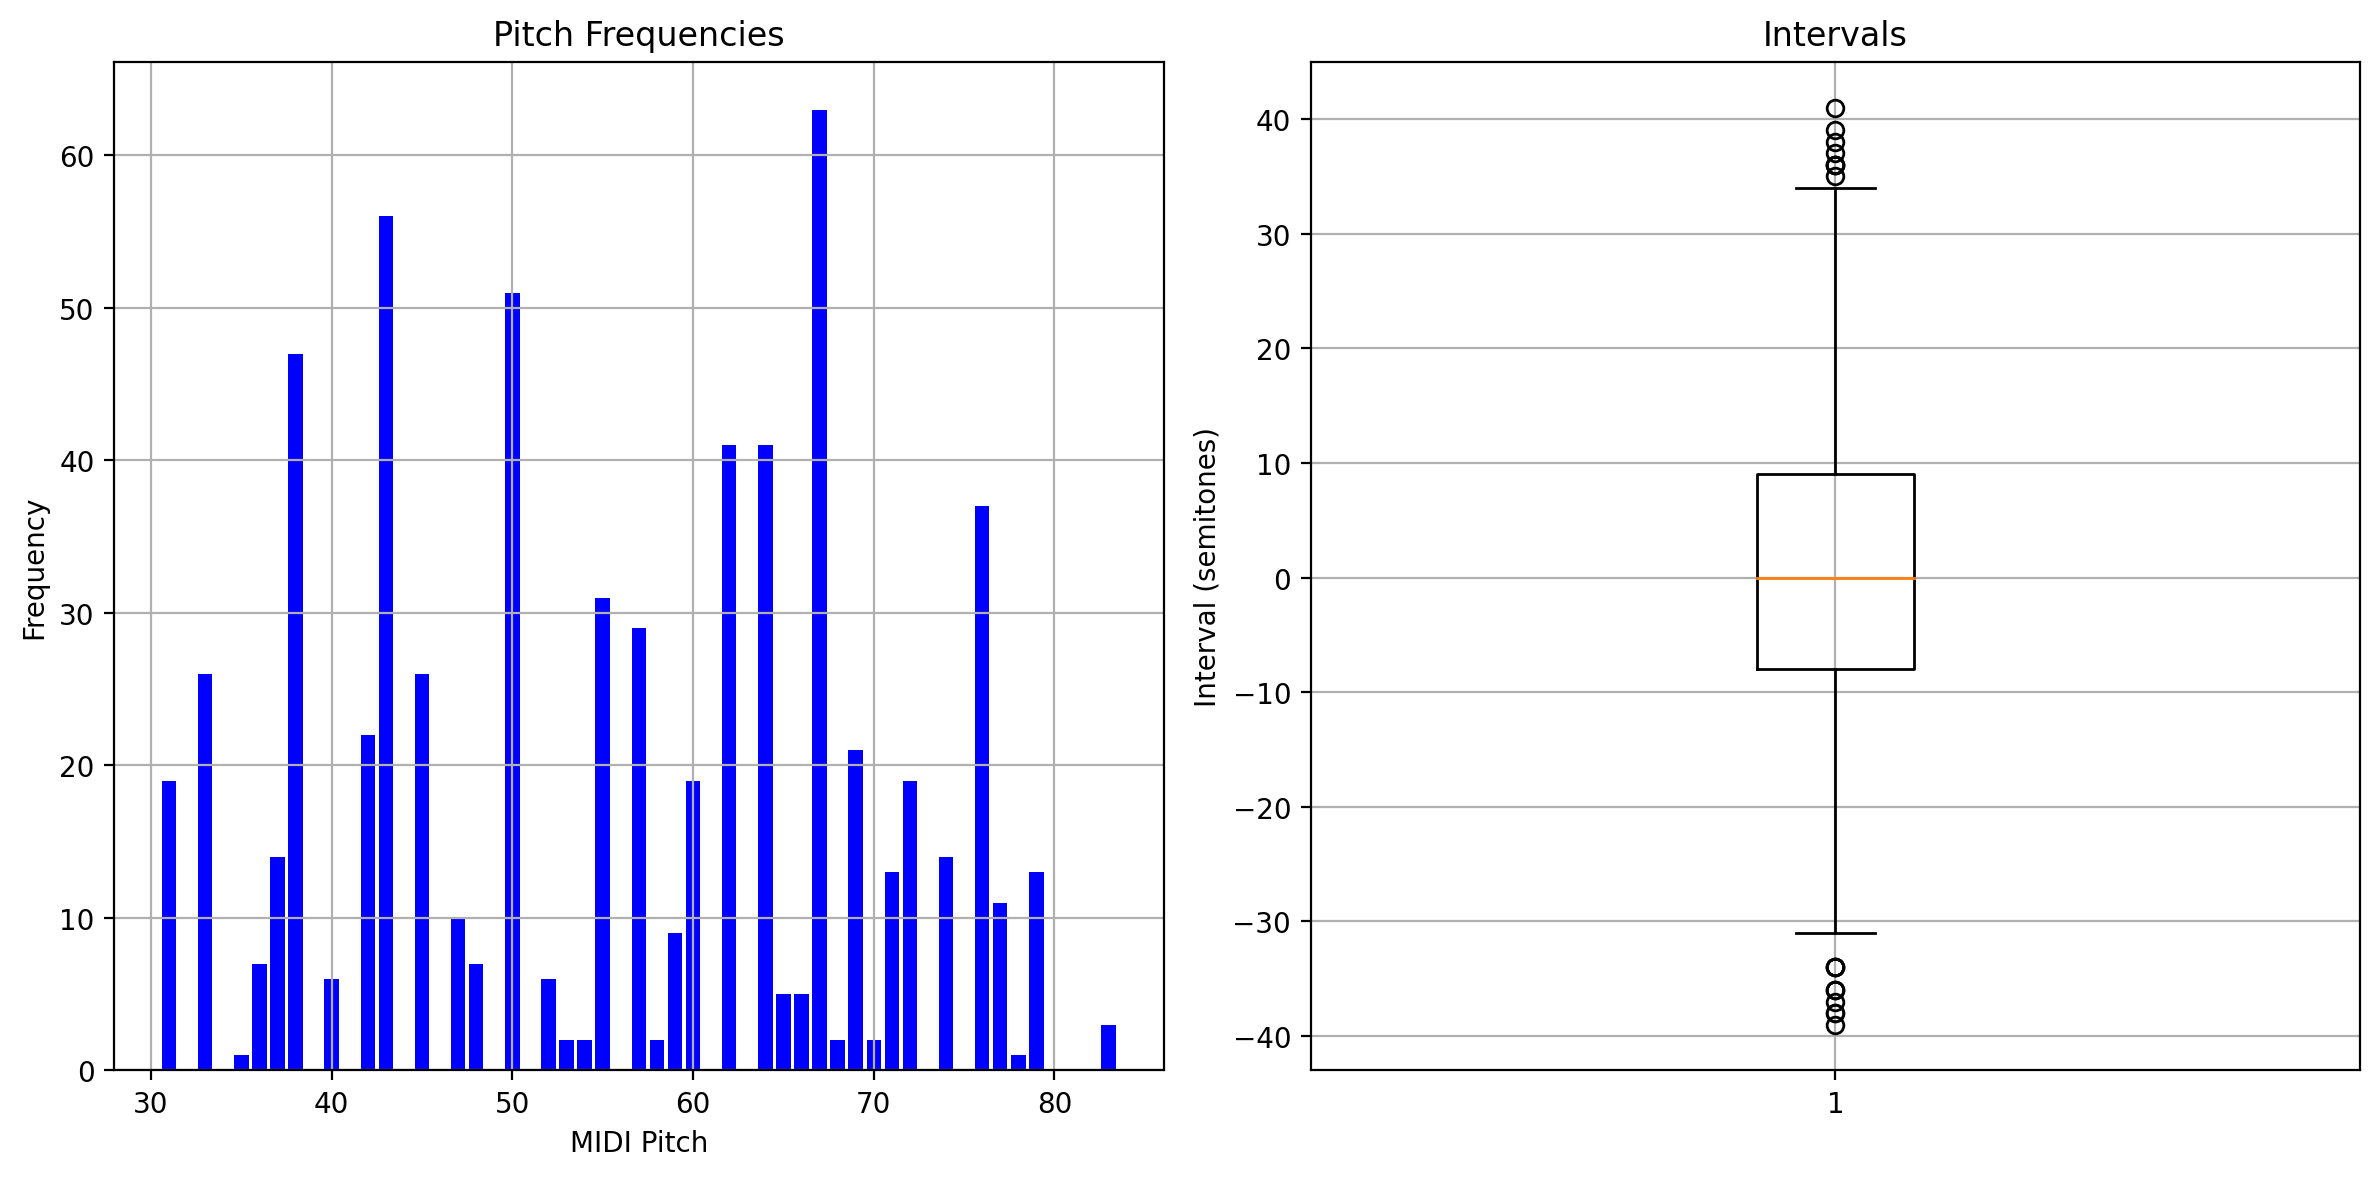

In [ ]:
def plot_pitches_and_intervals(pitches, intervals):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    unique_pitches = list(set(pitches))
    frequencies = [pitches.count(pitch) for pitch in unique_pitches]
    plt.bar(unique_pitches, frequencies, color='blue')
    plt.title('Pitch Frequencies')
    plt.xlabel('MIDI Pitch')
    plt.ylabel('Frequency')
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.boxplot(intervals)
    plt.title('Intervals')
    plt.ylabel('Interval (semitones)')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

plot_pitches_and_intervals(pitches, intervals)

In [ ]:
def extract_tempo_changes(midi_file_path):
    midi_data = music21.converter.parse(midi_file_path)

    # Get all tempo tokens
    tempo_changes = []
    for tempo in midi_data.recurse().getElementsByClass('TempoIndication'):
        if isinstance(tempo, music21.tempo.MetronomeMark):
            # Get the time and BPM value of the tempo event
            time = tempo.offset
            bpm = tempo.number
            tempo_changes.append((time, bpm))

    return tempo_changes

tempo_changes = extract_tempo_changes(file_path)
print("Tempo Changes:", tempo_changes)

Tempo Changes: [(0.0, 120)]


### Task A

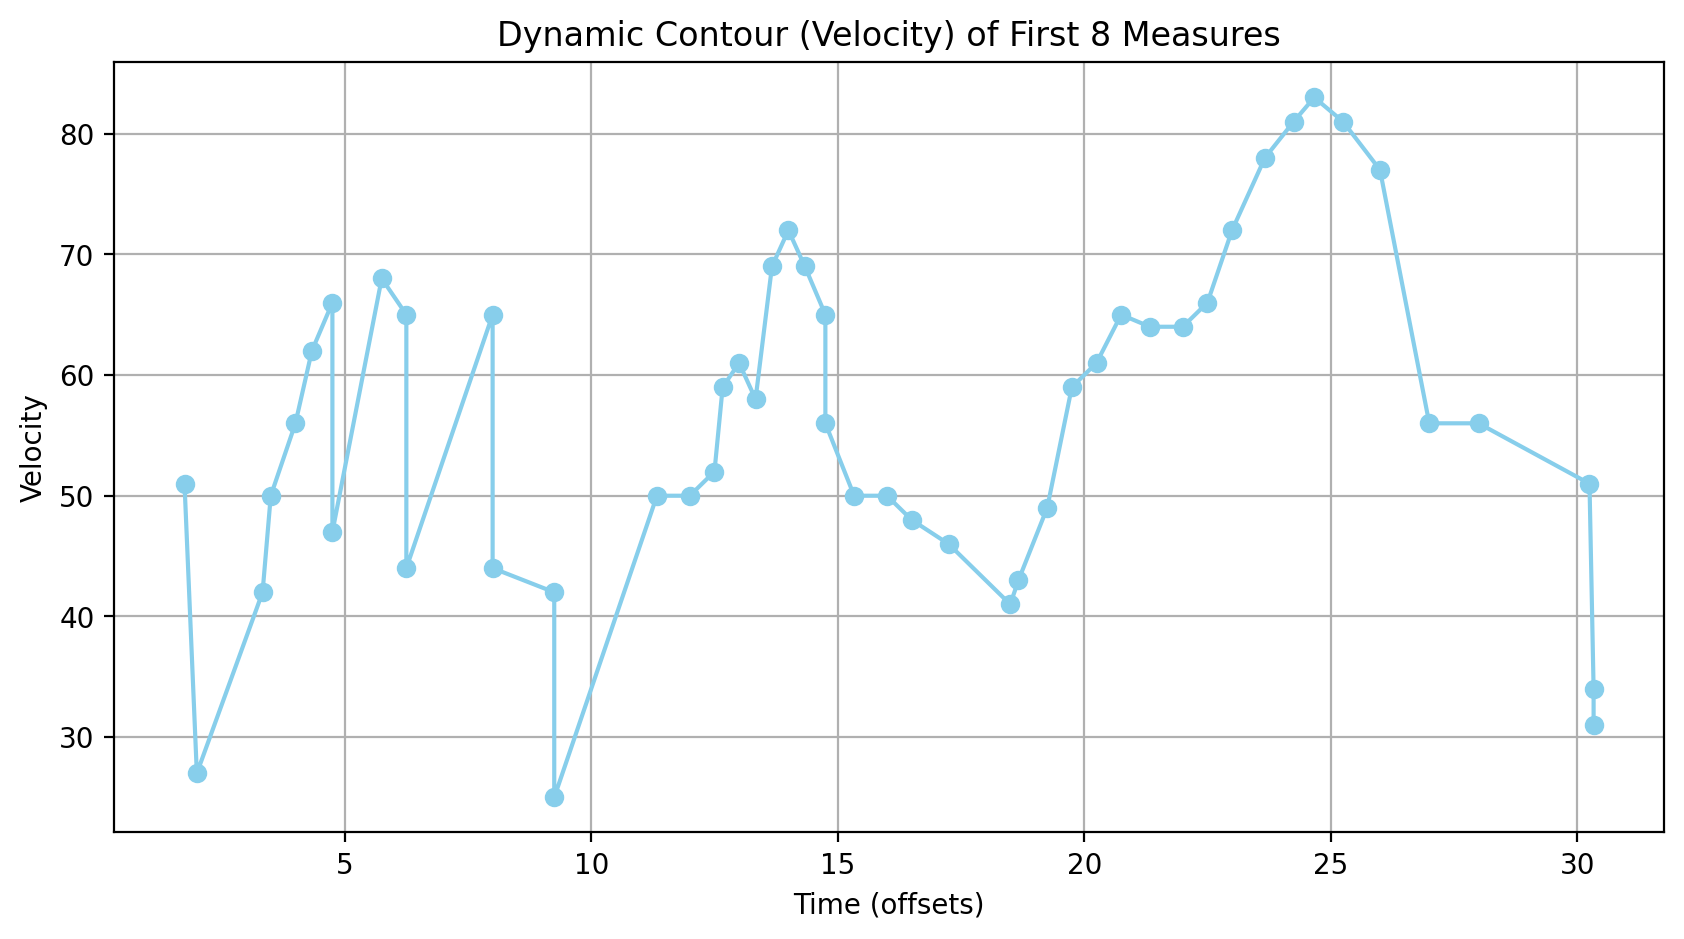

In [39]:
import music21 as m21
from matplotlib import pyplot as plt

# 加载 MIDI 文件
midi_path = '/content/drive/MyDrive/MunA10M.mid'
midi_file = m21.converter.parse(midi_path)

measures = midi_file.measures(1, 8)
all_notes = measures.flatten().notes

# extract velocity and offset time of notes
velocities = [note.volume.velocity for note in all_notes if note.volume.velocity is not None]
# note不全 缺一些note
offsets = [float(note.offset) for note in all_notes]

plt.figure(figsize=(10, 5))
plt.plot(offsets, velocities, marker='o',color='skyblue')
plt.title('Dynamic Contour (Velocity) of First 8 Measures')
plt.xlabel('Time (offsets)')
plt.ylabel('Velocity')
plt.grid(True)
plt.show()


In [44]:
print(measures)
print(all_notes)
print(velocities)
print(offsets)

<music21.stream.Score 0x7a46fb9b4520>
<music21.stream.iterator.StreamIterator for Score:0x7a46fbbdb370 @:0>
[34, 31]
[1.75, 2.0, 3.3333333333333335, 3.5, 4.0, 4.333333333333333, 4.75, 4.75, 5.75, 6.25, 6.25, 8.0, 8.0, 9.25, 9.25, 11.333333333333334, 12.0, 12.5, 12.666666666666666, 13.0, 13.333333333333334, 13.666666666666666, 14.0, 14.333333333333334, 14.75, 14.75, 15.333333333333334, 16.0, 16.5, 17.25, 18.5, 18.666666666666668, 19.25, 19.75, 20.25, 20.75, 21.333333333333332, 22.0, 22.5, 23.0, 23.666666666666668, 24.25, 24.666666666666668, 25.25, 26.0, 27.0, 28.0, 30.25, 30.333333333333332, 30.333333333333332]


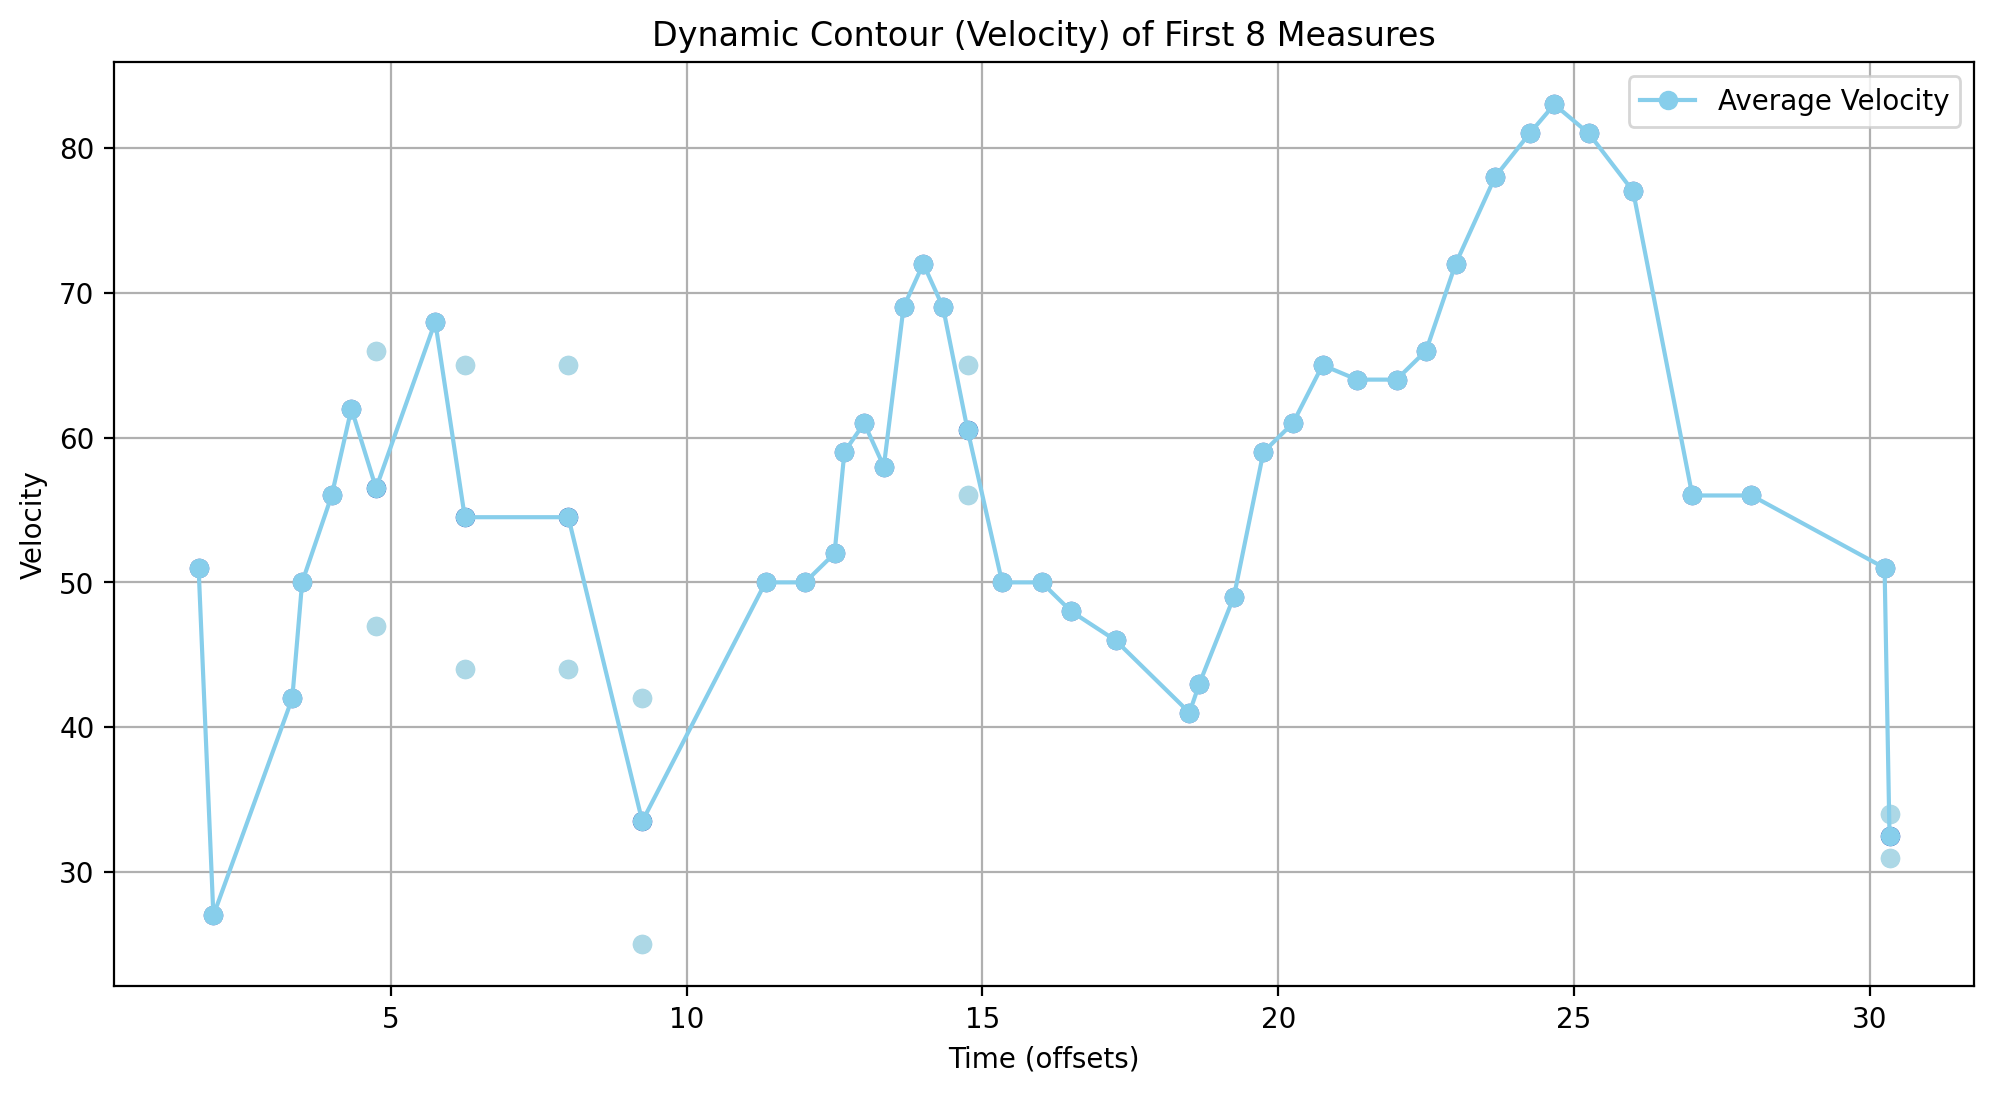

In [40]:
measures = midi_file.measures(1, 8)
all_notes = measures.flatten().notes

offsets_to_velocities = {}
for note in all_notes:
    if note.volume.velocity is not None:
        offset = float(note.offset)
        if offset not in offsets_to_velocities:
            offsets_to_velocities[offset] = []
        offsets_to_velocities[offset].append(note.volume.velocity)

average_velocities = [sum(velocities) / len(velocities) for velocities in offsets_to_velocities.values()]
time_offsets = list(offsets_to_velocities.keys())

plt.figure(figsize=(12, 6))
plt.plot(time_offsets, average_velocities, marker='o', linestyle='-', color='skyblue', label='Average Velocity')
plt.scatter(time_offsets, average_velocities, color='darkblue')

for offset, velocities in offsets_to_velocities.items():
    for velocity in velocities:
        plt.scatter([offset]*len(velocities), velocities, color='lightblue')

plt.title('Dynamic Contour (Velocity) of First 8 Measures')
plt.xlabel('Time (offsets)')
plt.ylabel('Velocity')
plt.grid(True)
plt.legend()
plt.show()

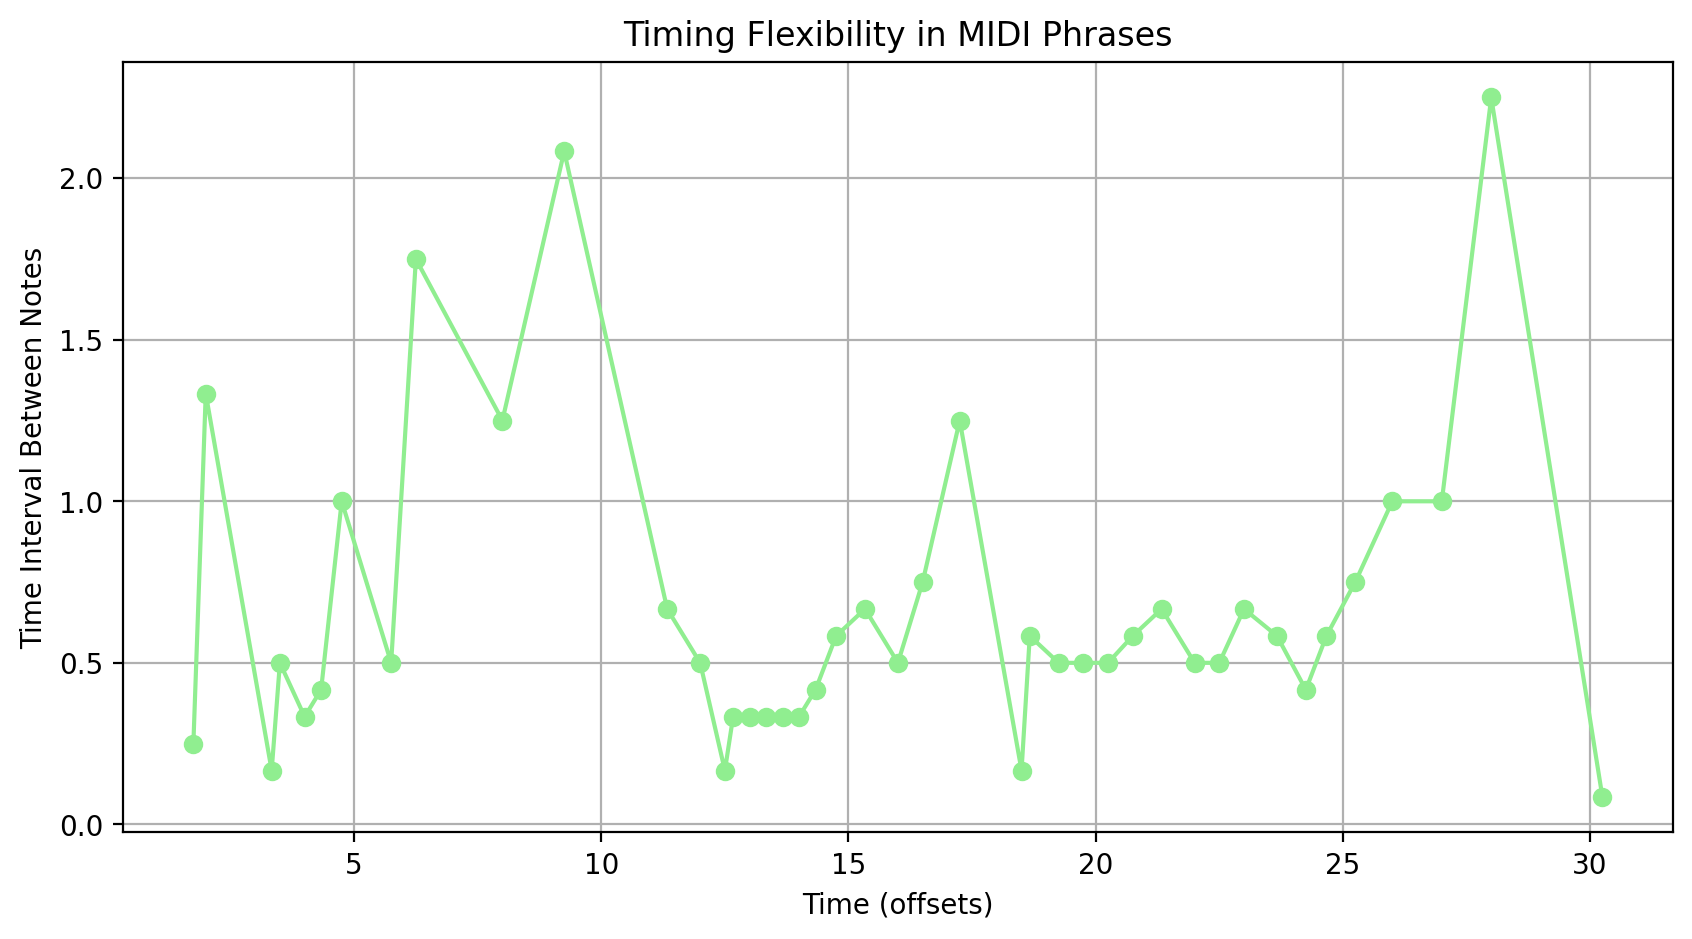

In [36]:
# 计算时间间隔
time_intervals = [offsets[i+1] - offsets[i] for i in range(len(offsets)-1)]

plt.figure(figsize=(10, 5))
plt.plot(offsets[:-1], time_intervals, marker='o', color='lightgreen')
plt.title('Timing Flexibility in MIDI Phrases')
plt.xlabel('Time (offsets)')
plt.ylabel('Time Interval Between Notes')
plt.grid(True)
plt.show()